In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch

from utils import MnistData
from models import ModelManager, ModelType

In [3]:
max_norm = 50 / 255

In [4]:
model = ModelManager.get_trained(ModelType.MnistCnnPatt)

In [5]:
batch_size = 10

In [6]:
data = MnistData(True)

In [18]:
def fgsm(benign_examples: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
    loss_fn = nn.CrossEntropyLoss()
    benign_examples = benign_examples.detach()
    benign_examples.requires_grad = True
    if benign_examples.grad is not None:
        benign_examples.grad.zero_()
    loss = loss_fn(model(benign_examples), labels)
    loss.backward()
    print('Gradient:')
    print(benign_examples.grad)
    adversarial_examples = benign_examples + max_norm * benign_examples.grad.apply_(lambda x: 1 if x >= 0 else -1)
    return MnistData.clip_for_image(adversarial_examples)

In [8]:
benign_examples, labels = data.draw_first(batch_size, model)

Následující buňka má gradient malý, ale nenulový

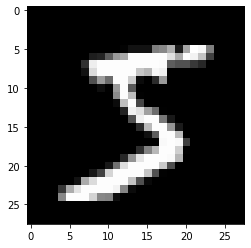

Gradient:
tensor([[[[ 8.9842e-24,  2.0870e-23, -4.5650e-23, -1.1800e-22, -5.6983e-22,
           -5.3427e-22, -1.0189e-21, -7.9457e-22, -1.2264e-21, -1.0644e-21,
           -6.2230e-22, -2.5979e-22, -3.1001e-22, -2.4858e-22, -5.2044e-22,
           -5.8212e-22, -6.6307e-22, -4.2396e-22, -1.1562e-22, -5.2343e-23,
            2.1809e-22,  8.1389e-23,  3.8648e-23, -7.9141e-23, -9.0326e-23,
            4.8920e-24,  3.5339e-23,  0.0000e+00],
          [ 1.9116e-23, -4.6852e-24, -2.5212e-22, -4.1840e-22, -1.0406e-21,
           -6.8440e-22,  1.2629e-21,  4.7797e-21,  4.7903e-21,  2.7566e-21,
            1.6840e-21, -3.6141e-22, -9.7849e-23, -2.8536e-22,  5.5418e-22,
            1.3678e-21,  4.7793e-21,  8.2700e-21,  9.7072e-21,  7.2037e-21,
            3.9426e-21,  1.9133e-21,  2.1696e-21,  2.6879e-21,  3.1757e-21,
            2.3391e-21,  1.4869e-21,  0.0000e+00],
          [ 4.6472e-23,  8.2785e-24,  7.8698e-23,  4.2008e-22,  2.2654e-21,
            2.5721e-21,  4.6834e-21,  7.3810e-21,  1

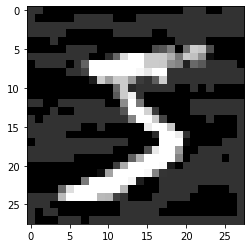

In [19]:
i = 0
MnistData.display(benign_examples[i], scale=True)
MnistData.display(fgsm(benign_examples[i].unsqueeze(0), labels[i].unsqueeze(0)), scale=True)

Následující buňka má gradient identicky roven nule.
Stejný kód, jen jiný vzorek.

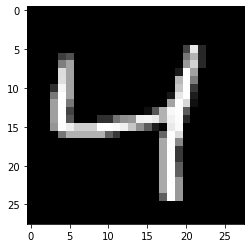

Gradient:
tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.

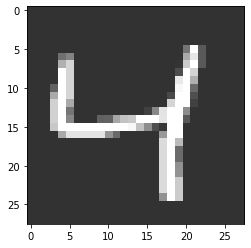

In [16]:
j = 2
MnistData.display(benign_examples[j], scale=True)
MnistData.display(fgsm(benign_examples[j].unsqueeze(0), labels[j].unsqueeze(0)), scale=True)